<a href="https://colab.research.google.com/github/rajitbasu/Deep_Learning/blob/main/Covid%2019%20%26%20Pneumonia%20Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten 
from tensorflow.keras.models import Model
from tensorflow.python.keras.models import Sequential
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from keras.optimizers import Adam
import keras
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = [150, 150]

train_path = '/content/drive/My Drive/CXR_Data/train'
valid_path = '/content/drive/My Drive/CXR_data/test'

In [ ]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
for layer in resnet.layers:
    layer.trainable = False

94773248/94765736 [==============================] - 0s 0us/step


In [ ]:
folders = glob('/content/drive/My Drive/CXR_Data/train/*')

In [ ]:
x = Flatten()(resnet.output)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [ ]:
model.compile(
  loss=keras.losses.categorical_crossentropy,
  optimizer='Adam',
  metrics=['accuracy']
)

In [ ]:

training_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   horizontal_flip = True)

training_set = training_datagen.flow_from_directory('/content/drive/My Drive/CXR_Data/train',
                                                 target_size = (150, 150),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/drive/My Drive/CXR_Data/test',
                                            target_size = (150, 150),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 3878 images belonging to 2 classes.
Found 424 images belonging to 2 classes.


In [ ]:
training_set.class_indices

{'COVID19': 0, 'PNEUMONIA': 1}

In [ ]:
hist = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=10,
  validation_steps=len(test_set)
)

Epoch 1/20
10/10 [==============================] - 403s 40s/step - loss: 0.4319 - accuracy: 0.8500 - val_loss: 0.5442 - val_accuracy: 0.7264
Epoch 2/20
10/10 [==============================] - 140s 14s/step - loss: 0.4310 - accuracy: 0.8813 - val_loss: 0.5519 - val_accuracy: 0.7500
Epoch 3/20
10/10 [==============================] - 214s 21s/step - loss: 0.4494 - accuracy: 0.8687 - val_loss: 0.7779 - val_accuracy: 0.7264
Epoch 4/20
10/10 [==============================] - 155s 15s/step - loss: 0.4489 - accuracy: 0.9125 - val_loss: 0.5215 - val_accuracy: 0.8137
Epoch 5/20
10/10 [==============================] - 132s 13s/step - loss: 0.4195 - accuracy: 0.8562 - val_loss: 0.7487 - val_accuracy: 0.7264
Epoch 6/20
10/10 [==============================] - 121s 12s/step - loss: 0.4252 - accuracy: 0.8750 - val_loss: 0.6121 - val_accuracy: 0.7264
Epoch 7/20
10/10 [==============================] - 153s 15s/step - loss: 0.3575 - accuracy: 0.8500 - val_loss: 0.6153 - val_accuracy: 0.7264
Epoch 

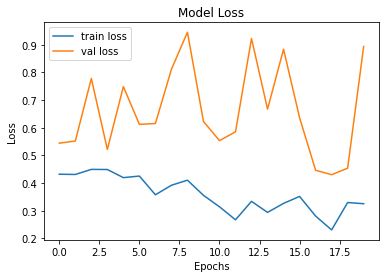

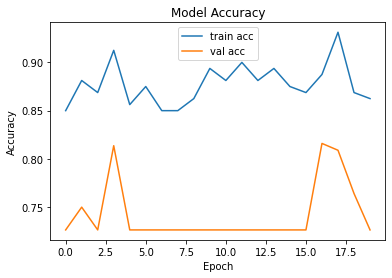

In [ ]:
# plot the loss
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(hist.history['accuracy'], label='train acc')
plt.plot(hist.history['val_accuracy'], label='val acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
model.save('model1_resnet50.h5')

In [ ]:
model.evaluate_generator(test_set)

[0.89646977186203, 0.7264150977134705]

In [ ]:
test_acc = model.evaluate_generator(test_set)
print("\n%s: %.2f%%" % (model.metrics_names[1], test_acc[1]*100))


accuracy: 72.64%


Instructions for updating:
Please use Model.predict, which supports generators.


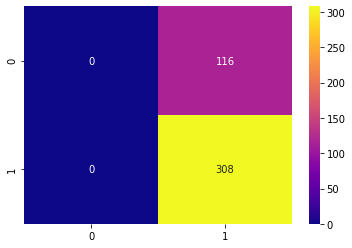

In [ ]:
# Obtain predictions
from sklearn.metrics import confusion_matrix
import seaborn as sns
pred = model.predict_generator(test_set) # Gives class probabilities
pred = np.round(pred) # Gives one-hot encoded classes
pred = np.argmax(pred, axis = 1) # Gives class labels

# Obtain actual labels
actual = test_set.classes
    
# Now plot matrix
cm = confusion_matrix(actual, pred, labels = [0, 1])
sns.heatmap(
    cm, 
    cmap="plasma",
    annot = True, 
    fmt = "d"
)
plt.show()